# BinWaves example in Cantabria (Propagation)

**In this notebook**: 
<br><br>
Here is where the construction of the library of pre-run cases for all the monochromatic wave systems is made.
<br><br>
Steps:
- Generates wave conditions for all given frequencies and directions.
- Generates SWAN cases and runs them.
- Extracts SWAN cases and saves output.
- Plots the library for all the cases and some larger example ones.

## Create SWAN cases

In [1]:
from bluemath_tk.wrappers.swan.swan_example import (
    example_directions,
    example_frequencies,
)
from bluemath_tk.waves.binwaves import generate_swan_cases

# Generate swan model parameters

swan_cases_df = (
    generate_swan_cases(
        directions_array=example_directions,
        frequencies_array=example_frequencies,
    )
    .astype(float)
    .to_dataframe()
    .reset_index()
)
swan_cases_df.to_csv("outputs/swan_cases.csv", index=False)
model_parameters = swan_cases_df.to_dict(orient="list")

swan_cases_df

,dir,freq,hs,tp,spr,gamma
0,262.5,0.035000,1.0,28.5714,2.0,50.0
1,262.5,0.038500,1.0,25.9740,2.0,50.0
2,262.5,0.042350,1.0,23.6128,2.0,50.0
3,262.5,0.046585,1.0,21.4661,2.0,50.0
4,262.5,0.051243,1.0,19.5147,2.0,50.0
...,...,...,...,...,...,...
691,277.5,0.344744,0.1,2.9007,2.0,50.0
692,277.5,0.379219,0.1,2.6370,2.0,50.0
693,277.5,0.417136,0.1,2.3973,2.0,50.0
694,277.5,0.458842,0.1,2.1794,2.0,50.0


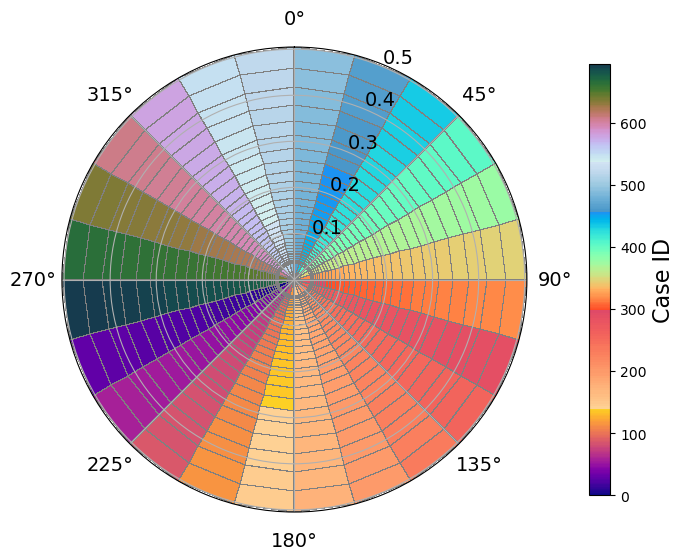

In [2]:
import numpy as np
from bluemath_tk.waves.binwaves import plot_selected_cases_grid

# Plot the cases grid

plot_selected_cases_grid(
    frequencies=np.array(example_frequencies),
    directions=np.array(example_directions),
    figsize=(8, 8),
)

## Build and run SWAN cases

In [ ]:
import os
from bluemath_tk.wrappers.swan.swan_example import BinWavesWrapper

# Define the input templates and output directory for the wrapper

templates_dir = os.path.join(os.getcwd(), "templates")
templates_name = ["INPUT", "depth.dat", "buoys.loc"]
output_dir = os.path.join(os.getcwd(), "CAN_cases")

# Create an instance of the SWAN model wrapper

swan_wrapper = BinWavesWrapper(
    templates_dir=templates_dir,
    templates_name=templates_name,
    model_parameters=model_parameters,
    output_dir=output_dir,
)

2025-03-11 10:54:08,164 - BinWavesWrapper - WARNING - Setting self.num_workers to 1. Change it using self.set_num_processors_to_use method.
2025-03-11 10:54:08,164 - BinWavesWrapper - INFO - Parameter dir has the correct type: <class 'float'>
2025-03-11 10:54:08,165 - BinWavesWrapper - WARNING - Parameter freq is not in the default_parameters
2025-03-11 10:54:08,165 - BinWavesWrapper - INFO - Parameter hs has the correct type: <class 'float'>
2025-03-11 10:54:08,166 - BinWavesWrapper - INFO - Parameter tp has the correct type: <class 'float'>
2025-03-11 10:54:08,166 - BinWavesWrapper - INFO - Parameter spr has the correct type: <class 'float'>
2025-03-11 10:54:08,167 - BinWavesWrapper - WARNING - Parameter gamma is not in the default_parameters


In [4]:
# Build the input files

# swan_wrapper.build_cases(mode="one_by_one")

# Set the cases directories from the output directory
# Execute if the cases are already built

swan_wrapper.set_cases_dirs_from_output_dir()

2025-03-11 10:54:09,384 - BinWavesWrapper - INFO - Cases directories set from /home/tausiaj/GitHub-GeoOcean/BlueMath/test_cases/swan/CAN_mono.


In [5]:
# List available launchers

swan_wrapper.list_available_launchers()

{'bash': 'swanrun -input input',
 'docker_serial': 'docker run --rm -v .:/case_dir -w /case_dir geoocean/rocky8 swan_serial.exe'}

In [6]:
# Run the model

# swan_wrapper.run_cases_in_background(launcher="docker", num_workers=5)

In [ ]:
import xarray as xr
from bluemath_tk.core.operations import convert_utm_to_lonlat

# Post-process the output files

# cases_bulk_parameters = swan_wrapper.postprocess_cases(write_output_nc=False)
# cases_bulk_parameters["Xp"], cases_bulk_parameters["Yp"] = convert_utm_to_lonlat(
#     cases_bulk_parameters.Xp.values, cases_bulk_parameters.Yp.values, "SPAIN"
# )
# cases_bulk_parameters.to_netcdf("outputs/cases_bulk_parameters.nc")

cases_bulk_parameters = xr.open_dataset("outputs/cases_bulk_parameters.nc")
cases_bulk_parameters["Xp"], cases_bulk_parameters["Yp"] = convert_utm_to_lonlat(
    cases_bulk_parameters.Xp.values, cases_bulk_parameters.Yp.values, "SPAIN"
)
cases_bulk_parameters

<xarray.Dataset> Size: 2GB
Dimensions:   (case_num: 692, Yp: 355, Xp: 699)
Coordinates:
  * Xp        (Xp) float64 6kB -4.111 -4.11 -4.108 ... -3.249 -3.248 -3.247
  * Yp        (Yp) float64 3kB 43.37 43.37 43.37 43.37 ... 43.69 43.69 43.69
  * case_num  (case_num) int64 6kB 0 2 5 6 8 9 10 ... 690 691 692 693 694 695
Data variables:
    Hsig      (case_num, Yp, Xp) float32 687MB ...
    Tm02      (case_num, Yp, Xp) float32 687MB ...
    Dir       (case_num, Yp, Xp) float32 687MB ...

"not all values found in index 'case_num'. Try setting the `method` keyword argument (example: method='nearest')."
"not all values found in index 'case_num'. Try setting the `method` keyword argument (example: method='nearest')."
"not all values found in index 'case_num'. Try setting the `method` keyword argument (example: method='nearest')."
"not all values found in index 'case_num'. Try setting the `method` keyword argument (example: method='nearest')."


/home/tausiaj/miniforge3/envs/bluemath-dev/lib/python3.12/site-packages/matplotlib/colors.py:2293: RuntimeWarning: invalid value encountered in subtract
  resdat -= vmin


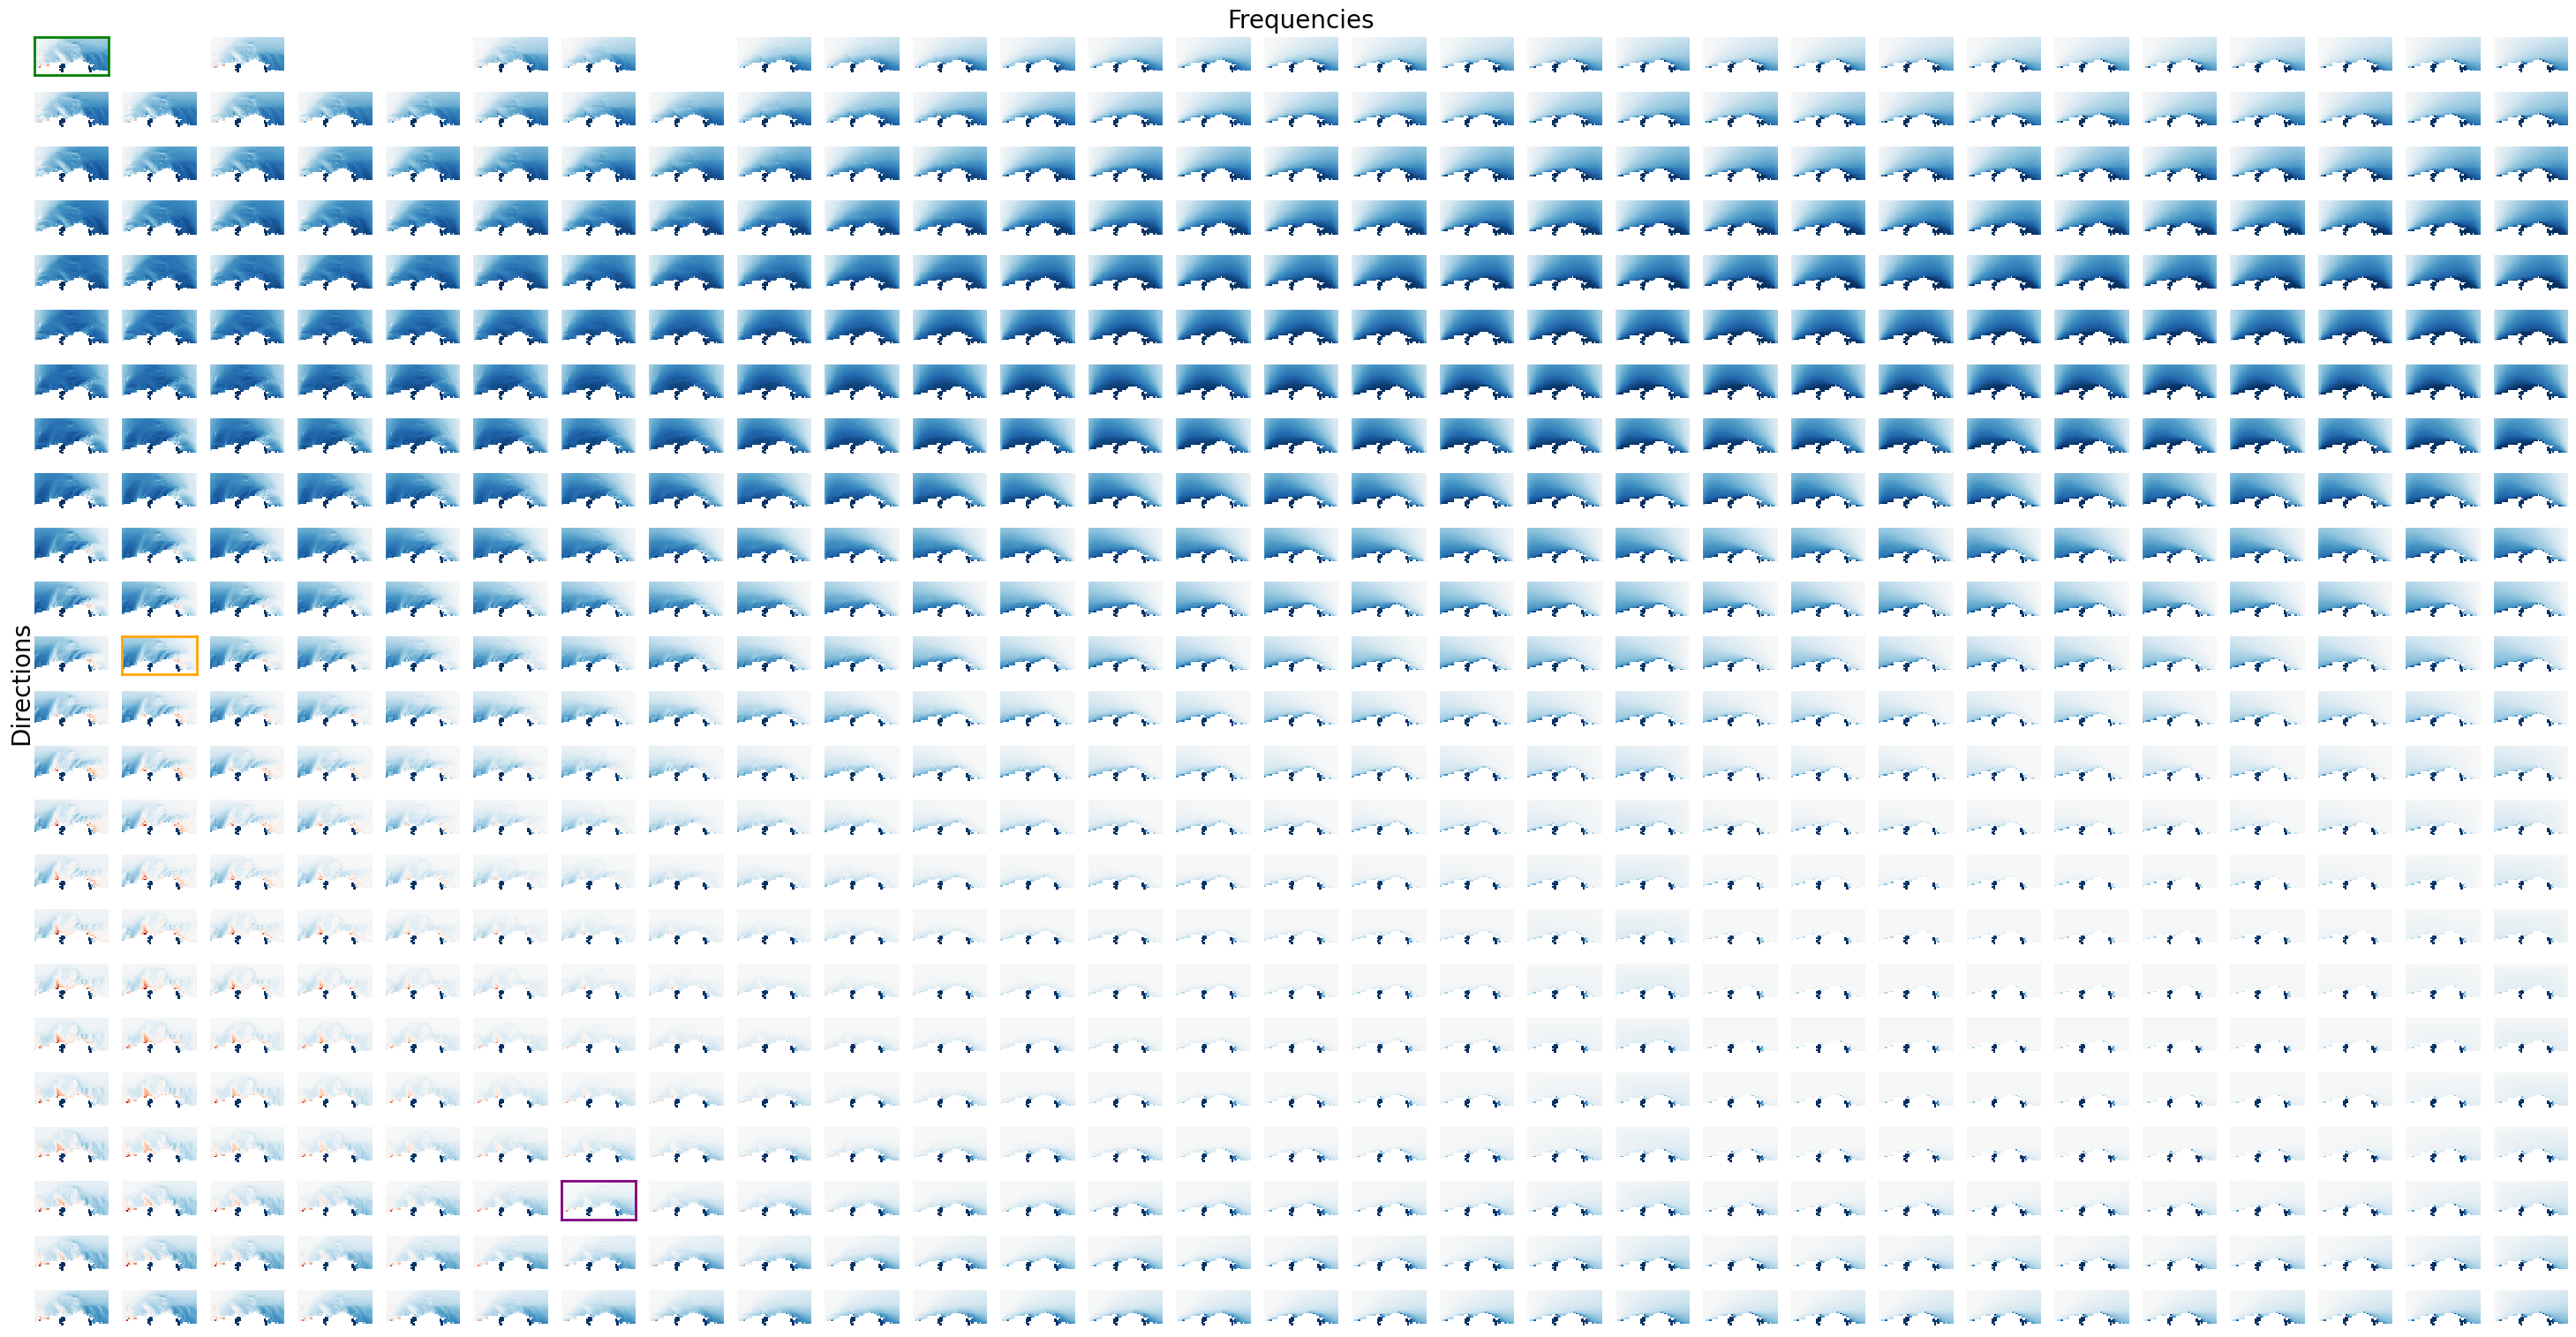

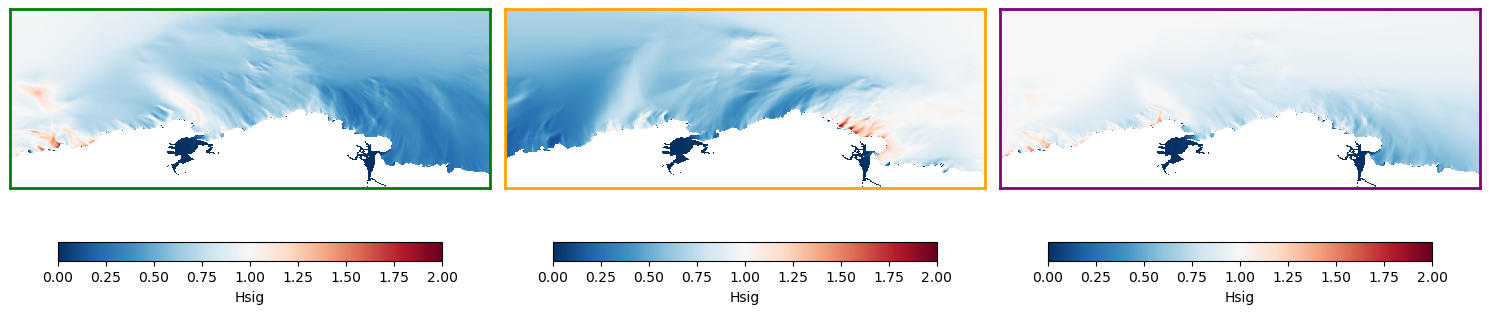

In [8]:
from utils.plotting import plot_cases_grid

plot_cases_grid(
    data=cases_bulk_parameters.Hsig.where(
        cases_bulk_parameters.case_num.isin(
            swan_cases_df.where(swan_cases_df["hs"] == 1.0).dropna().index.values
        ),
        cases_bulk_parameters.Hsig * 10,
    ),
)

/home/tausiaj/GitHub-GeoOcean/BlueMath/bluemath_tk/core/operations.py:342: RuntimeWarning: invalid value encountered in multiply
  x_rad = x_deg * np.pi / 180


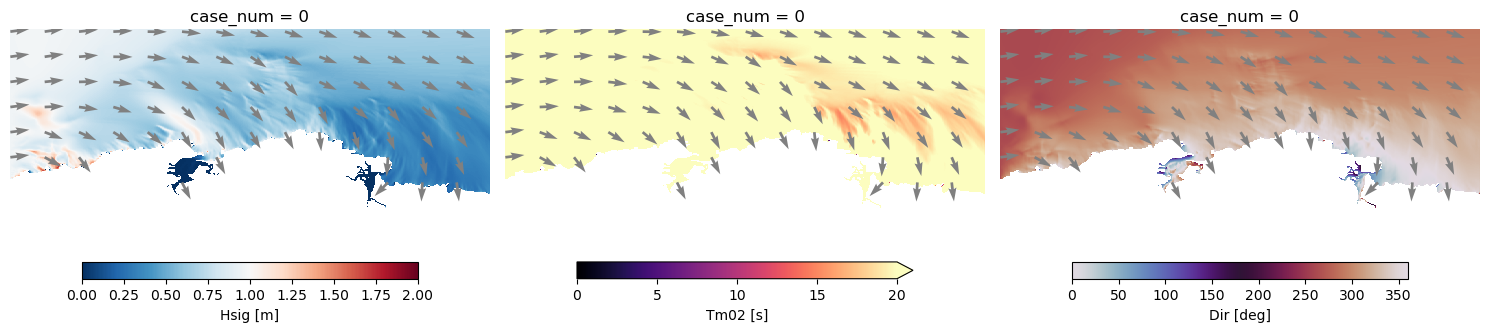

In [9]:
from utils.plotting import plot_case_variables

plot_case_variables(
    data=cases_bulk_parameters.isel(case_num=0),
)

In [ ]:
from bluemath_tk.waves.binwaves import process_kp_coefficients

# Get input and output spectra files from self.cases_dirs

input_files = [os.path.join(d, "input_spectra.bnd") for d in swan_wrapper.cases_dirs]
output_files = [os.path.join(d, "output.spec") for d in swan_wrapper.cases_dirs]

# Extract binwaves kp coeffs

kp_coeffs = process_kp_coefficients(
    list_of_input_spectra=input_files,
    list_of_output_spectra=output_files,
)
# kp_coeffs.to_netcdf("outputs/kp_coeffs.nc")

# kp_coeffs = xr.open_dataset("outputs/kp_coeffs_sites.nc")
kp_coeffs

Error processing /home/tausiaj/GitHub-GeoOcean/BlueMath/test_cases/swan/CAN_mono/0000/input_spectra.bnd and /home/tausiaj/GitHub-GeoOcean/BlueMath/test_cases/swan/CAN_mono/0000/output.spec
[Errno 2] No such file or directory: '/home/tausiaj/GitHub-GeoOcean/BlueMath/test_cases/swan/CAN_mono/0000/output.spec'
Error processing /home/tausiaj/GitHub-GeoOcean/BlueMath/test_cases/swan/CAN_mono/0001/input_spectra.bnd and /home/tausiaj/GitHub-GeoOcean/BlueMath/test_cases/swan/CAN_mono/0001/output.spec
[Errno 2] No such file or directory: '/home/tausiaj/GitHub-GeoOcean/BlueMath/test_cases/swan/CAN_mono/0001/output.spec'
Error processing /home/tausiaj/GitHub-GeoOcean/BlueMath/test_cases/swan/CAN_mono/0002/input_spectra.bnd and /home/tausiaj/GitHub-GeoOcean/BlueMath/test_cases/swan/CAN_mono/0002/output.spec
[Errno 2] No such file or directory: '/home/tausiaj/GitHub-GeoOcean/BlueMath/test_cases/swan/CAN_mono/0002/output.spec'
Error processing /home/tausiaj/GitHub-GeoOcean/BlueMath/test_cases/swan/C

<xarray.DataArray 'efth' (case_num: 693, site: 2, freq: 38, dir: 120)> Size: 51MB
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
...
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]],


       [[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]]])
Coordinates:
  * case_num  (case_num) int64 6kB 3 4 5 6 7 8 9 ... 689 690 691 692 693 694 695
  * site      (site) int64 16B 1 2
  * freq      (freq) float64 304B 0.03 0.033 0.0363 0.0399 ... 0.8273 0.9096 1.0
  * dir       (dir) float64 960B 1.5 4.5 7.5 10.5 ... 349.5 352.5 355.5 358.5
    time      datetime64[ns] 8B 2025-03-11T10:54:00
    lat       float64 8B 0.0
    lon       float64 8B 0.0